# **Project Name**    -  Sales Prediction using Python




# **Problem Statement**


Accurately forecasting sales is crucial for effective business planning and inventory management. This project aims to develop a predictive model using Python that analyzes historical sales data to forecast future sales. By leveraging machine learning techniques, the model will help businesses make data-driven decisions, optimize stock levels, and improve overall profitability.


## ***1. Dataset Overview***

In [3]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Load Dataset
df = pd.read_csv("../Downloads/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## ***2. Understanding The Variables***

### Check Unique Values for each variable.

In [14]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


## ***3. Data Vizualization***

#### Chart - 1 : Checking for outliers 

<Axes: ylabel='Sales'>

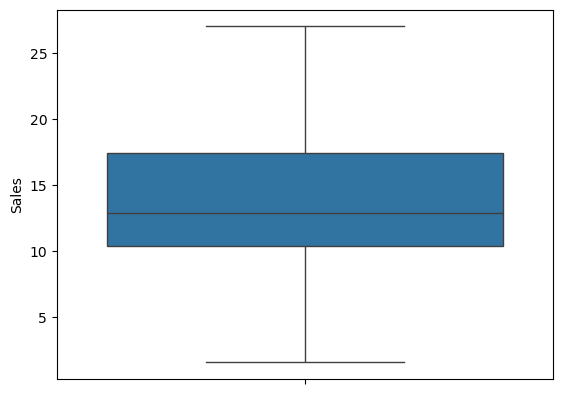

In [16]:
sns.boxplot(y=df['Sales'])

#### Chart - 2 : Distribution Of Numerical Features

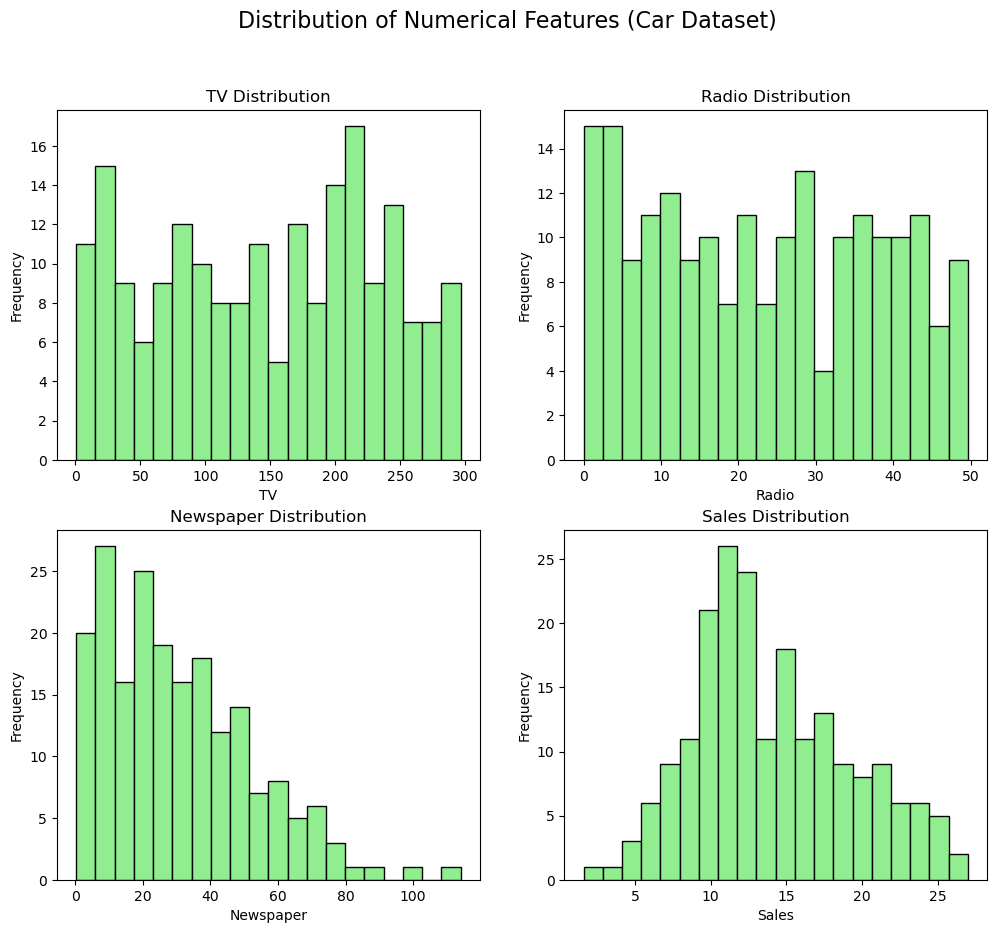

In [18]:
# List of numerical columns you want to plot
numerical_columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Set up the plot grid
plt.figure(figsize=(12, 10))
plt.suptitle('Distribution of Numerical Features (Car Dataset)', fontsize=16)

# Plot each numerical feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()


#### Chart - 3 : Correlation Heatmap

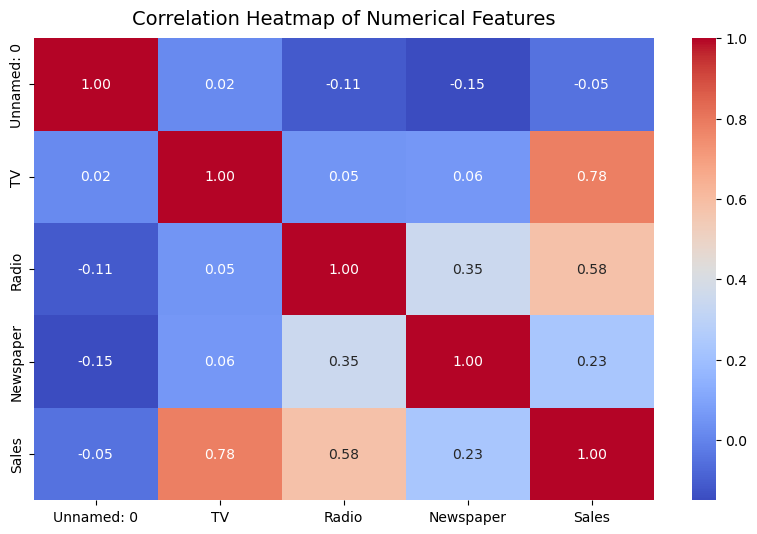

In [20]:
# Select only numerical columns 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr().round(2)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

# Title and layout
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=10)

# Show plot
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all object-type (string) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

### 2. Data Scaling

In [26]:
# Defining the X and y
x=df.drop(columns=['Sales'], axis=1)
y=df['Sales']

### 3. Data Splitting

In [33]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8)

In [35]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
12.9    4
15.9    4
9.5     3
10.1    3
8.7     3
       ..
22.1    1
19.8    1
21.7    1
22.4    1
7.3     1
Name: count, Length: 107, dtype: int64

In [37]:
x_train

,Unnamed: 0,TV,Radio,Newspaper
35,36,290.7,4.1,8.5
25,26,262.9,3.5,19.5
164,165,117.2,14.7,5.4
60,61,53.5,2.0,21.4
31,32,112.9,17.4,38.6
...,...,...,...,...
179,180,165.6,10.0,17.6
3,4,151.5,41.3,58.5
16,17,67.8,36.6,114.0
183,184,287.6,43.0,71.8


In [39]:
x_test

,Unnamed: 0,TV,Radio,Newspaper
196,197,94.2,4.9,8.1
114,115,78.2,46.8,34.5
28,29,248.8,27.1,22.9
171,172,164.5,20.9,47.4
32,33,97.2,1.5,30.0
99,100,135.2,41.7,45.9
125,126,87.2,11.8,25.9
142,143,220.5,33.2,37.9
158,159,11.7,36.9,45.2
42,43,293.6,27.7,1.8


In [41]:
y_train

35     12.8
25     12.0
164    11.9
60      8.1
31     11.9
       ... 
179    12.6
3      18.5
16     12.5
183    26.2
91      7.3
Name: Sales, Length: 160, dtype: float64

In [43]:
y_test

196     9.7
114    14.6
28     18.9
171    14.5
32      9.6
99     17.2
125    10.6
142    20.1
158     7.3
42     20.7
138     9.6
181    12.2
169    15.0
39     21.5
80     11.8
197    12.8
133    19.6
47     23.2
173    11.7
199    13.4
94     11.5
17     24.4
29     10.5
190    10.8
13      9.7
140    10.9
175    27.0
65      9.3
72      8.8
180    10.5
178    11.8
184    17.6
2       9.3
100    11.7
92     19.4
61     24.2
52     22.6
168    17.1
160    14.4
101    23.8
Name: Sales, dtype: float64

## ***6. ML Model Implementation***

### ML Model - 1 : Linear regression

In [47]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = model1.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 1.2592307324879375
Mean Squared Error: 2.52898279841739
Root Mean Squared Error: 1.5902775853345195
R² Score: 0.9107909338450259


### ML Model - 2 : Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(random_state=20)
model2.fit(x_train, y_train)

DecisionTreeRegressor(random_state=20)

In [54]:
y_pred = model2.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.6575000000000001
Mean Squared Error: 0.6962499999999998
Root Mean Squared Error: 0.8344159634139316
R² Score: 0.975440002063569


### ML Model - 3 : Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
y_pred = model3.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.6074000000000002
Mean Squared Error: 0.5171742999999978
Root Mean Squared Error: 0.7191483157179732
R² Score: 0.9817568405877557


### ML Model - 4 : SVM (Support Vector Machine)

In [64]:
# ML Model - 4 Implementation

# 1. Scale features
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# 2. Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 3. Train SVR
from sklearn.svm import SVR
model4 = SVR(kernel='rbf', C=100, epsilon=0.1)
model4.fit(x_train, y_train)

SVR(C=100)

In [66]:
y_pred_scaled = model4.predict(x_test)

# Inverse transform and evaluate
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2_score(y_test_orig, y_pred))

Mean Absolute Error: 13.576144829787788
Mean Squared Error: 204.6924274400056
Root Mean Squared Error: 14.30707613176101
R² Score: 0.9729956215568893


### ML Model - 5 : Xtreme Gradient Boosting

In [68]:
from xgboost import XGBRegressor

model5 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model5.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
y_pred = model5.predict(x_test)

# Evaluation for regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.13483391356671734
Mean Squared Error: 0.02955191635143556
Root Mean Squared Error: 0.1719067082793326
R² Score: 0.9746405418864441


## ***Selection of best model***

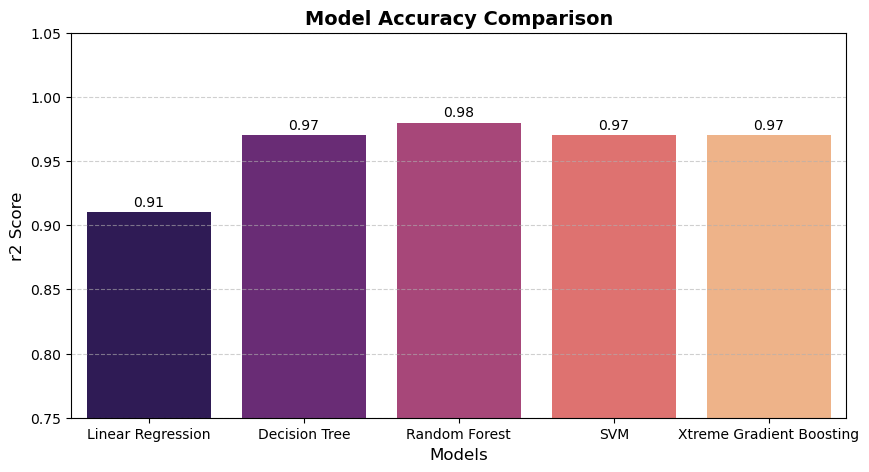

In [73]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Xtreme Gradient Boosting']
accuracy_scores = [0.91,0.97, 0.98, 0.97 ,0.97]
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="magma")
plt.xlabel("Models", fontsize=12)
plt.ylabel("r2 Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)
plt.ylim(0.75, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Checking for Underfitting and Overfitting

In [75]:
from sklearn.metrics import r2_score

# For each model
train_r2 = r2_score(y_train, model5.predict(x_train))
test_r2 = r2_score(y_test, model5.predict(x_test))

print("Train R²:", train_r2)
print("Test R²:", test_r2)


Train R²: 0.9998440939361996
Test R²: 0.9746405418864441


# **Conclusion**

In this Car Price Prediction project, the primary objective was to accurately estimate the resale value of used cars based on a combination of key features including year of manufacture, present price, fuel type, transmission type, and ownership history. After a detailed workflow involving data exploration, preprocessing, model selection, and evaluation, the XGBoost Regressor emerged as the most effective model due to its high predictive accuracy and robustness.